In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\adi89\OneDrive\Desktop\Sales-Data-Analysis\Sample - Superstore.csv", encoding="ISO-8859-1")


In [5]:
# Step 3: Explore data
print(df.head())
print(df.info())
print(df.describe())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [6]:
# Step 4: Clean data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month


In [8]:
print (df)

      Row ID        Order ID Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08  11/11/2016    Second Class   
1          2  CA-2016-152156 2016-11-08  11/11/2016    Second Class   
2          3  CA-2016-138688 2016-06-12   6/16/2016    Second Class   
3          4  US-2015-108966 2015-10-11  10/18/2015  Standard Class   
4          5  US-2015-108966 2015-10-11  10/18/2015  Standard Class   
...      ...             ...        ...         ...             ...   
9989    9990  CA-2014-110422 2014-01-21   1/23/2014    Second Class   
9990    9991  CA-2017-121258 2017-02-26    3/3/2017  Standard Class   
9991    9992  CA-2017-121258 2017-02-26    3/3/2017  Standard Class   
9992    9993  CA-2017-121258 2017-02-26    3/3/2017  Standard Class   
9993    9994  CA-2017-119914 2017-05-04    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States      

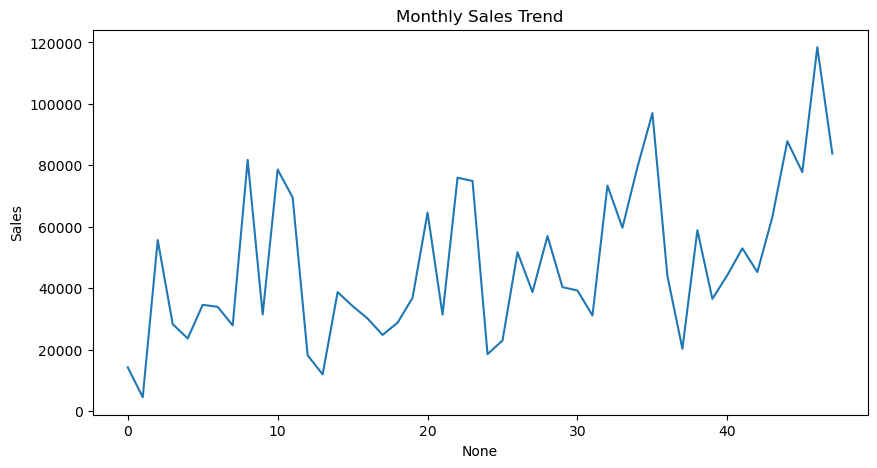

In [9]:
# Step 5: Sales trend by month
monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.show()

In [10]:
# Step 6: Top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


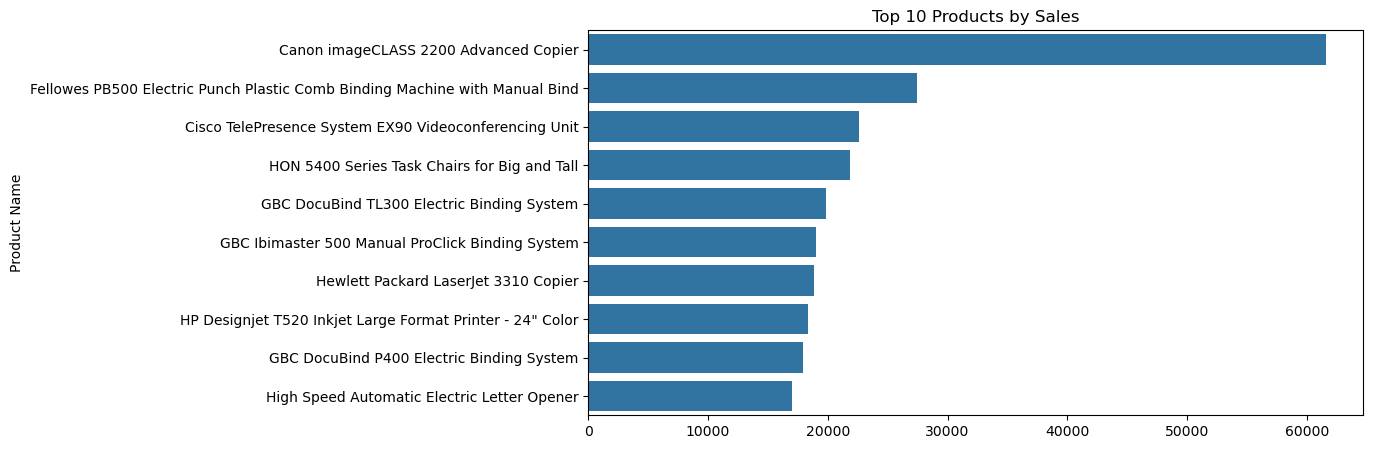

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.show()

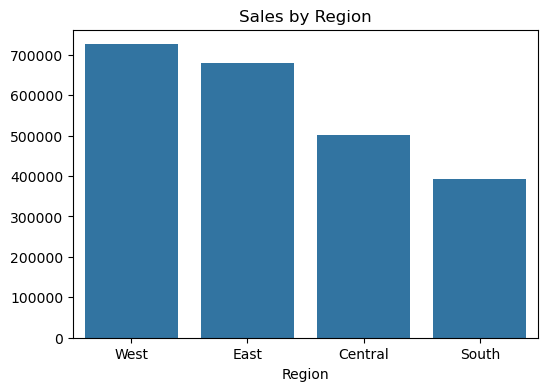

In [12]:
# Step 7: Sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.show()